In [61]:
import pandas as pd

file_path = '/kaggle/input/demand/reversed_finaldatacsv.xlsx'

df = pd.read_excel(file_path)
df.head()

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0


In [62]:
df['Datetime_formatted'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M:%S')

In [63]:
df

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0,2016-01-01 08:00:00
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0,2016-01-01 09:00:00
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0,2016-01-01 10:00:00
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0,2016-01-01 11:00:00
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0,2016-01-01 12:00:00
...,...,...,...,...,...,...,...
70464,15-01-2024 08:00:00,8619.0,8619,4331,866,2434,2024-01-15 08:00:00
70465,15-01-2024 09:00:00,9018.0,9018,4224,1202,2572,2024-01-15 09:00:00
70466,15-01-2024 10:00:00,9162.0,9162,4223,1300,2573,2024-01-15 10:00:00
70467,15-01-2024 11:00:00,9211.0,9211,4101,1427,2567,2024-01-15 11:00:00


In [64]:
daily_counts = df.groupby(df['Datetime_formatted'].dt.date).size()
daily_counts 

Datetime_formatted
2016-01-01    16
2016-01-02    24
2016-01-03    24
2016-01-04    24
2016-01-05    24
              ..
2024-01-11    24
2024-01-12    24
2024-01-13    24
2024-01-14    24
2024-01-15    13
Length: 2937, dtype: int64

In [65]:
num_days_with_24_entries = (daily_counts == 24).sum()
num_days_with_24_entries

2935

In [66]:
dates_to_keep = daily_counts[daily_counts == 24].index
df_filtered = df[df['Datetime_formatted'].dt.date.isin(dates_to_keep)]
df_filtered

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
16,02-01-2016 00:00:00,3737.0,3737,3269,123,0,2016-01-02 00:00:00
17,02-01-2016 01:00:00,4023.0,4023,3312,198,0,2016-01-02 01:00:00
18,02-01-2016 02:00:00,5606.0,5606,3786,1313,0,2016-01-02 02:00:00
19,02-01-2016 03:00:00,5847.0,5847,4235,1099,0,2016-01-02 03:00:00
20,02-01-2016 04:00:00,5880.0,5880,4287,1080,0,2016-01-02 04:00:00
...,...,...,...,...,...,...,...
70451,14-01-2024 19:00:00,10209.0,10209,4240,2459,2464,2024-01-14 19:00:00
70452,14-01-2024 20:00:00,10289.0,10289,4369,2391,2513,2024-01-14 20:00:00
70453,14-01-2024 21:00:00,10004.0,10004,4421,2099,2406,2024-01-14 21:00:00
70454,14-01-2024 22:00:00,9560.0,9560,4237,1864,2381,2024-01-14 22:00:00


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

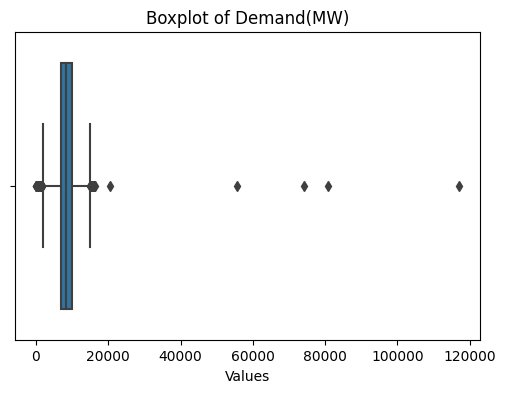

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [69]:
df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)

<ipython-input-69-1d42b4394300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)


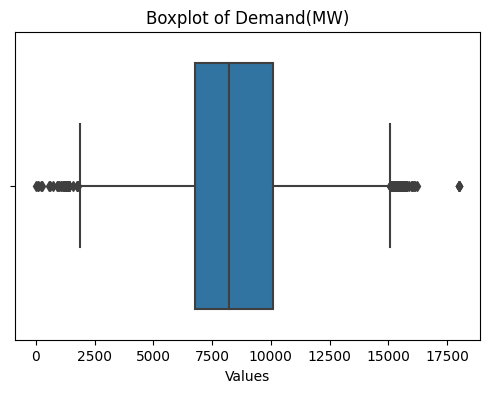

In [70]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [72]:
demand_data = df_filtered['Demand(MW)'].values

In [73]:
demand_data

array([ 3737,  4023,  5606, ..., 10004,  9560,  8793])

In [74]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(demand_data.reshape(-1, 1))
data_scaled

array([[0.20734689],
       [0.22324108],
       [0.31121485],
       ...,
       [0.55562965],
       [0.53095476],
       [0.48832944]])

In [75]:
train_samples = 2800 * 24
val_samples = 2 * 24
test2_samples = 2 * 24
test7_samples = 7 * 24
look_back = 24

In [76]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [77]:
train_data = data_scaled[:train_samples]  
val_data = data_scaled[train_samples:train_samples + val_samples]  
test2_data = data_scaled[train_samples + val_samples:train_samples + val_samples + test2_samples] 
test7_data = data_scaled[train_samples + val_samples + test2_samples:train_samples + val_samples + test2_samples + test7_samples]

In [78]:
X_train, y_train = create_dataset(train_data, look_back)
X_test2, y_test2 = create_dataset(test2_data, look_back)
X_test7, y_test7 = create_dataset(test7_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)

In [79]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1])
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1])

In [80]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
class GWO:
    def __init__(self, obj_func, dim, bounds, num_wolves=5, max_iter=20):
        self.obj_func = obj_func
        self.dim = dim
        self.bounds = np.array(bounds)
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        
        self.alpha, self.beta, self.delta = None, None, None
        self.alpha_score, self.beta_score, self.delta_score = float('inf'), float('inf'), float('inf')
        
        self.wolves = np.random.uniform(self.bounds[:, 0], self.bounds[:, 1], (self.num_wolves, self.dim))
        
    def optimize(self):
        for t in range(self.max_iter):
            for i in range(self.num_wolves):
                fitness = self.obj_func(self.wolves[i])
                
                if fitness < self.alpha_score:
                    self.delta, self.delta_score = self.beta, self.beta_score
                    self.beta, self.beta_score = self.alpha, self.alpha_score
                    self.alpha, self.alpha_score = self.wolves[i], fitness
                elif fitness < self.beta_score:
                    self.delta, self.delta_score = self.beta, self.beta_score
                    self.beta, self.beta_score = self.wolves[i], fitness
                elif fitness < self.delta_score:
                    self.delta, self.delta_score = self.wolves[i], fitness
                
            a = 2 - t * (2 / self.max_iter)
            
            for i in range(self.num_wolves):
                for j in range(self.dim):
                    A1, A2, A3 = a * (2 * np.random.rand() - 1), a * (2 * np.random.rand() - 1), a * (2 * np.random.rand() - 1)
                    C1, C2, C3 = 2 * np.random.rand(), 2 * np.random.rand(), 2 * np.random.rand()
                    
                    D_alpha = abs(C1 * self.alpha[j] - self.wolves[i][j])
                    D_beta = abs(C2 * self.beta[j] - self.wolves[i][j])
                    D_delta = abs(C3 * self.delta[j] - self.wolves[i][j])
                    
                    X1 = self.alpha[j] - A1 * D_alpha
                    X2 = self.beta[j] - A2 * D_beta
                    X3 = self.delta[j] - A3 * D_delta
                    
                    self.wolves[i][j] = np.clip((X1 + X2 + X3) / 3, self.bounds[j, 0], self.bounds[j, 1])
        
        return self.alpha, self.alpha_score

In [82]:
from sklearn.metrics import mean_squared_error
def xgb_objective(params):
    params = {
        'max_depth': int(params[0]),
        'learning_rate': params[1],
        'n_estimators': int(params[2]),
        'subsample': params[3],
        'colsample_bytree': params[4]
    }
    model = xgb.XGBRegressor(**params, objective='reg:squarederror')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return -np.mean(scores)

In [83]:
bounds = [(3, 10), (0.01, 0.3), (50, 300), (0.5, 1.0), (0.5, 1.0)]

In [84]:
gwo = GWO(obj_func=xgb_objective, dim=5, bounds=bounds, num_wolves=5, max_iter=20)
best_params, best_score = gwo.optimize() 

In [85]:
best_params = {
    'max_depth': int(best_params[0]),
    'learning_rate': best_params[1],
    'n_estimators': int(best_params[2]),
    'subsample': best_params[3],
    'colsample_bytree': best_params[4]
}

In [86]:
best_params

{'max_depth': 3,
 'learning_rate': 0.12616280830492319,
 'n_estimators': 232,
 'subsample': 0.5303915353488483,
 'colsample_bytree': 0.6703466840944108}

In [87]:
xgb_model = xgb.XGBRegressor(
    n_estimators=256,  
    learning_rate=0.011827896600947194,  
    max_depth=9,  
    subsample=0.5645633348508898,  
    colsample_bytree=0.9421561675144147,  
    reg_lambda=0.1, 
    reg_alpha=0.1, 
    objective='reg:squarederror',
    random_state=42
)

In [88]:
evals_result = {}

# Train the model while tracking loss
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Track both train and val loss
    eval_metric='rmse',  # Root Mean Squared Error (RMSE) as the metric
    early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-rmse:0.12680	validation_1-rmse:0.27955
[1]	validation_0-rmse:0.12536	validation_1-rmse:0.27639
[2]	validation_0-rmse:0.12398	validation_1-rmse:0.27329
[3]	validation_0-rmse:0.12260	validation_1-rmse:0.27024
[4]	validation_0-rmse:0.12121	validation_1-rmse:0.26720


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.11984	validation_1-rmse:0.26416
[6]	validation_0-rmse:0.11848	validation_1-rmse:0.26115
[7]	validation_0-rmse:0.11714	validation_1-rmse:0.25817
[8]	validation_0-rmse:0.11582	validation_1-rmse:0.25526
[9]	validation_0-rmse:0.11451	validation_1-rmse:0.25236
[10]	validation_0-rmse:0.11322	validation_1-rmse:0.24950
[11]	validation_0-rmse:0.11194	validation_1-rmse:0.24667
[12]	validation_0-rmse:0.11068	validation_1-rmse:0.24389
[13]	validation_0-rmse:0.10944	validation_1-rmse:0.24112
[14]	validation_0-rmse:0.10821	validation_1-rmse:0.23848
[15]	validation_0-rmse:0.10700	validation_1-rmse:0.23579
[16]	validation_0-rmse:0.10580	validation_1-rmse:0.23308
[17]	validation_0-rmse:0.10461	validation_1-rmse:0.23046
[18]	validation_0-rmse:0.10344	validation_1-rmse:0.22784
[19]	validation_0-rmse:0.10228	validation_1-rmse:0.22525
[20]	validation_0-rmse:0.10114	validation_1-rmse:0.22268
[21]	validation_0-rmse:0.10001	validation_1-rmse:0.22017
[22]	validation_0-rmse:0.09890	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9421561675144147, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.011827896600947194, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=256, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
results = xgb_model.evals_result()

In [90]:
train_loss = results['validation_0']['rmse']
val_loss = results['validation_1']['rmse']

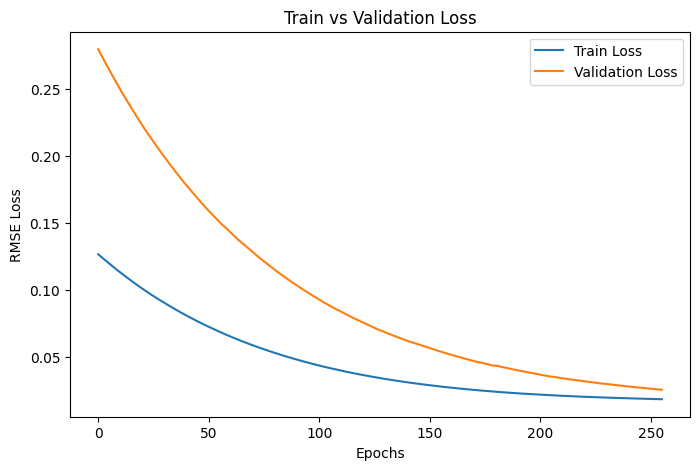

In [91]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

## 2 Days Prediction

In [92]:
y_pred2 = xgb_model.predict(X_test2)

In [93]:
y_pred2 = scaler.inverse_transform([y_pred2])
y_pred2 = y_pred2.reshape(y_pred2.shape[1], y_pred2.shape[0])
y_test2 = scaler.inverse_transform(y_test2)

In [94]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
mse = mean_squared_error(y_test2, y_pred2) 
mape = mean_absolute_percentage_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

In [95]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:308.90329900136953,
 MSE:95421.24813392952,
 MAPE:1.696008549813249%,
 R-Squared:0.7885320344536825


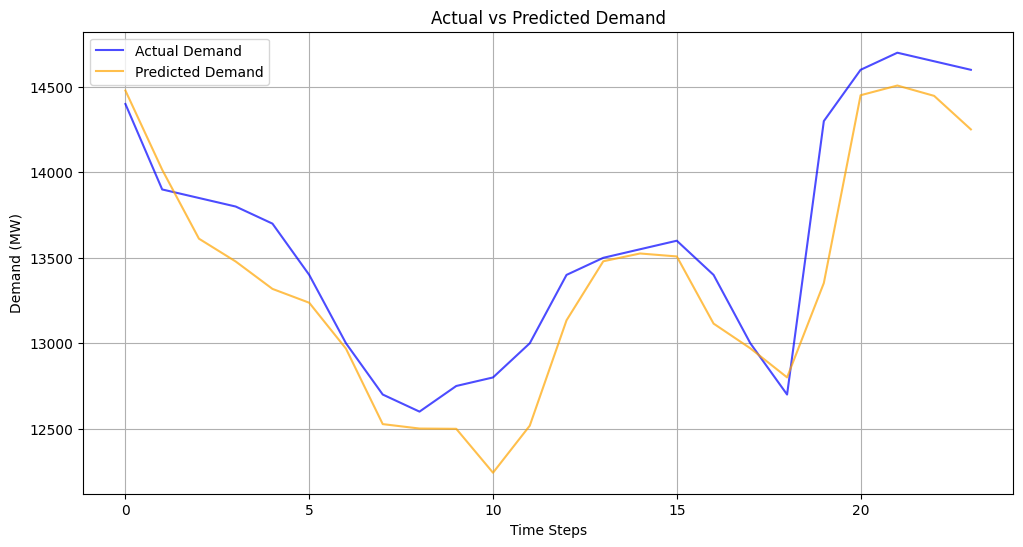

In [96]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test2.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred2.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

## 7 days prediction

In [97]:
y_pred7 = xgb_model.predict(X_test7)

In [98]:
y_pred7 = scaler.inverse_transform([y_pred7])
y_pred7 = y_pred7.reshape(y_pred7.shape[1], y_pred7.shape[0])
y_test7 = scaler.inverse_transform(y_test7)

In [99]:
rmse = np.sqrt(mean_squared_error(y_test7, y_pred7))
mse = mean_squared_error(y_test7, y_pred7) 
mape = mean_absolute_percentage_error(y_test7, y_pred7)
r2 = r2_score(y_test7, y_pred7)

In [100]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:490.3417390030991,
 MSE:240435.0210085834,
 MAPE:2.6679964210542226%,
 R-Squared:0.8470511326115664


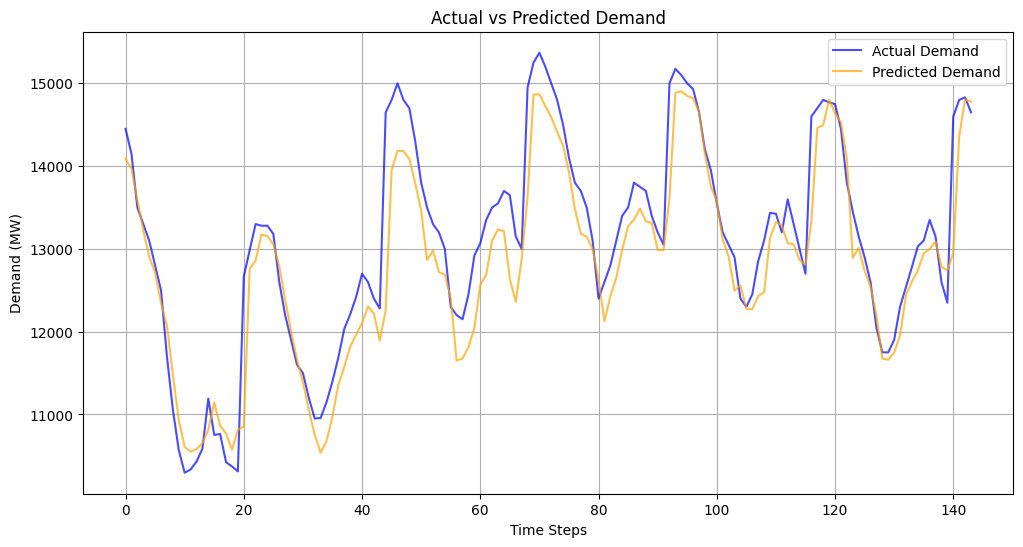

In [101]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test7.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred7.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()